<a href="https://colab.research.google.com/github/LambdaTheda/DS-Unit-2-Applied-Modeling/blob/master/5am_Sun_3_3_Unit_2_Sprint_3_SC_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_

# Applied Modeling Sprint Challenge: Predict Chicago food inspections 🍕

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to install packages in Colab:

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

#### Run this cell to load the data:

In [0]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:

- Confusion Matrix
- Permutation Importances
- Partial Dependence Plot, 1 feature isolation
- Partial Dependence Plot, 2 features interaction
- Shapley Values

_To earn a score of 3 for this part, make four of these visualization types._

## Part 1: Preprocessing

> You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

### Describe  Test, Train datasets

In [0]:
train.describe()

,Inspection ID,License #,Zip,Latitude,Longitude,Fail
count,5.191600e+04,5.191100e+04,51890.000000,51718.000000,51718.000000,51916.000000
mean,1.330265e+06,1.549491e+06,60628.834669,41.879568,-87.676663,0.258610
std,6.202664e+05,9.018283e+05,22.736963,0.081126,0.059509,0.437875
min,4.425000e+04,0.000000e+00,60007.000000,41.644670,-87.914428,0.000000
25%,6.796205e+05,1.140745e+06,60614.000000,41.830296,-87.707857,0.000000
50%,1.424226e+06,1.958619e+06,60625.000000,41.890166,-87.666524,0.000000
75%,1.946952e+06,2.215507e+06,60643.000000,41.939167,-87.634461,1.000000
max,2.279709e+06,8.700606e+06,60827.000000,42.021064,-87.525094,1.000000


In [0]:
test.describe()

,Inspection ID,License #,Zip,Latitude,Longitude,Fail
count,1.730600e+04,1.730400e+04,17298.000000,17245.000000,17245.000000,17306.000000
mean,1.323403e+06,1.562543e+06,60628.920338,41.879518,-87.676646,0.258581
std,6.240521e+05,8.947393e+05,23.462366,0.080895,0.059617,0.437867
min,4.426100e+04,0.000000e+00,60007.000000,41.644670,-87.914428,0.000000
25%,6.709562e+05,1.145506e+06,60614.000000,41.830619,-87.708016,0.000000
50%,1.418794e+06,1.964748e+06,60625.000000,41.890300,-87.666898,0.000000
75%,1.946488e+06,2.208688e+06,60643.000000,41.938989,-87.634501,1.000000
max,2.279564e+06,3.759896e+06,60827.000000,42.021064,-87.525872,1.000000


### Peek at First 5 Rows of Test, Train datasets

In [0]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


In [0]:
test.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,114835,7 - ELEVEN,7 - ELEVEN,46907.0,Grocery Store,Risk 2 (Medium),600 S DEARBORN,CHICAGO,IL,60605.0,2011-03-22T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.874481,-87.629357,"{'longitude': '-87.62935653990546', 'latitude'...",0
1,1575555,TAQUERIA LOS GALLOS INC,TAQUERIA LOS GALLOS,1044860.0,Restaurant,Risk 1 (High),4209-4211 W 26TH ST,CHICAGO,IL,60623.0,2015-09-15T00:00:00,Canvass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.844070,-87.729807,"{'longitude': '-87.72980747367433', 'latitude'...",0
2,671061,TROTTER'S TO GO,TROTTER'S TO GO,1092634.0,Restaurant,Risk 1 (High),1337 W FULLERTON AVE,CHICAGO,IL,60614.0,2012-03-02T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.925128,-87.662041,"{'longitude': '-87.66204067083224', 'latitude'...",0
3,1965844,BIG G'S PIZZA,BIG G'S PIZZA,2334691.0,Restaurant,Risk 1 (High),1132 W TAYLOR ST,CHICAGO,IL,60607.0,2016-10-04T00:00:00,Canvass Re-Inspection,"14. PREVIOUS SERIOUS VIOLATION CORRECTED, 7-42...",41.869546,-87.655501,"{'longitude': '-87.65550098867566', 'latitude'...",1
4,1751669,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,3491970.0,School,Risk 2 (Medium),1021 E 83RD,CHICAGO,IL,60619.0,2016-04-08T00:00:00,Canvass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.743933,-87.599291,"{'longitude': '-87.59929083361996', 'latitude'...",1


### Check for Nulls in Test, Train datasets

In [0]:
train.isnull().sum()

Inspection ID         0
DBA Name              0
AKA Name            623
License #             5
Facility Type       224
Risk                 12
Address               0
City                 53
State                10
Zip                  26
Inspection Date       0
Inspection Type       1
Violations         9655
Latitude            198
Longitude           198
Location            198
Fail                  0
dtype: int64

In [0]:
test.isnull().sum()

Inspection ID         0
DBA Name              0
AKA Name            222
License #             2
Facility Type        87
Risk                  7
Address               0
City                 18
State                 2
Zip                   8
Inspection Date       0
Inspection Type       0
Violations         3280
Latitude             61
Longitude            61
Location             61
Fail                  0
dtype: int64

### Check target 'Fail' Distribution

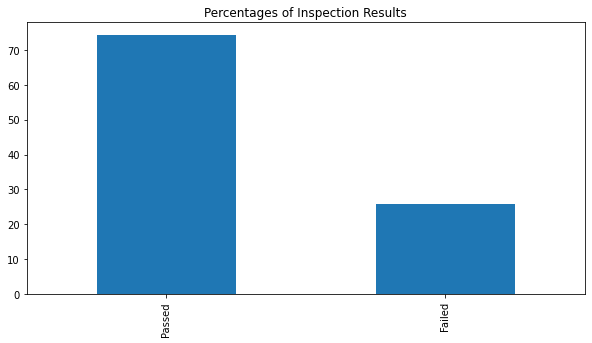

In [0]:
(train['Fail'].map({0: 'Passed', 1: 'Failed'}).value_counts(normalize=True) * 100)\
  .plot.bar(title='Percentages of Inspection Results', figsize=(10, 5))

The plot clearly shows this is an imbalanced class (binary) Classification problem.

### Exploratory Data Analysis & Cleaning

In [0]:
# Drop 'AKA Name' column in train set since I will use the "DBA Name" column and the former has nulls while the latter does not,
# and both serve similar enough functions as a business identifier for my purposes
train = train.drop(columns=['AKA Name'])
train

,Inspection ID,DBA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51911,1370030,VANILLE PATTISSERIE,2129404.0,Grocery Store,Risk 2 (Medium),131 N CLINTON ST,CHICAGO,IL,60661.0,2013-10-29T00:00:00,Canvass,NaN,41.884188,-87.641120,"{'longitude': '-87.64111966683218', 'latitude'...",0
51912,579387,CHICAGO STEAK HOUSE,2079910.0,Restaurant,Risk 2 (Medium),219 E 47TH ST,CHICAGO,IL,60653.0,2011-02-25T00:00:00,License Re-Inspection,NaN,41.809214,-87.620308,"{'longitude': '-87.62030817634384', 'latitude'...",0
51913,2169678,JEWEL FOOD STORE #3043,1144384.0,Grocery Store,Risk 1 (High),443 E 34TH ST,CHICAGO,IL,60616.0,2018-05-14T00:00:00,Canvass Re-Inspection,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.833045,-87.614611,"{'longitude': '-87.61461136443168', 'latitude'...",0
51914,1588969,RESTAURANTE SALVADORENO OLOCUILTA INC.,2308079.0,Restaurant,Risk 1 (High),3040 N LARAMIE AVE,CHICAGO,IL,60641.0,2015-11-30T00:00:00,Canvass Re-Inspection,NaN,41.936300,-87.756750,"{'longitude': '-87.75674980489909', 'latitude'...",0


Get counts of businesses with 'serious' level 'Violations,' as 'Violations' may be a significantly predictive feature.  The more/more serious violations a store has, the more likely it seems to reason- it would or could 'fail' an inspection.

In [0]:
import re # regex (regular expression) allows for string search/matching
train[train['Violations'].fillna('').str.contains('serious', flags=re.I)]['Fail'].value_counts()

1    8153
0      24
Name: Fail, dtype: int64

### Arrange X features matrices and y target vectors

In [0]:
# Train dataset
X_train = train.drop(columns = 'Fail')
y_train = train['Fail']

# Test dataset
X_test = test.drop(columns = 'Fail')
y_test = test['Fail']


In [0]:
# check shapes of Train and Test
print(f' X_train.shape: {X_train.shape}\n X_test.shape:  {X_test.shape}\n \n y_train.shape: {y_train.shape} \n y_test.shape:  {y_test.shape}')

 X_train.shape: (51916, 15)
 X_test.shape:  (17306, 16)
 
 y_train.shape: (51916,) 
 y_test.shape:  (17306,)


In [0]:
# check descriptive stats for Non-Numeric features; get KeyError: 'unique' if don't Transpose 
X_train.describe(exclude = 'number').T.sort_values(by = 'unique')

,count,unique,top,freq
State,51906,1,IL,51906
Risk,51904,3,Risk 1 (High),37731
City,51863,39,CHICAGO,51659
Inspection Type,51915,51,Canvass,24170
Facility Type,51692,329,Restaurant,34264
Inspection Date,51916,2257,2017-03-23T00:00:00,50
Location,51718,13410,"{'longitude': '-87.91442843927047', 'latitude'...",741
Address,51916,13954,11601 W TOUHY AVE,741
DBA Name,51916,17049,SUBWAY,654
Violations,42261,42164,45. FOOD HANDLER REQUIREMENTS MET - Comments: ...,3


### **Calculate Baseline Accuracy**- for Classification problems, this is the Majority Class or most often occuring (= mode) class, aka Category/target/label.  From the barplot above, we see it is **'Passed' (0); occuring ~74% of the time**. 

In [0]:
# get Baseline mode of target 'Fail'
y_train.value_counts(normalize = True)

0    0.74139
1    0.25861
Name: Fail, dtype: float64

Convert dates to datetime format for accessibility/computation

In [0]:
train['Inspection Date'] = pd.to_datetime(train['Inspection Date'])
train['Inspection Year'] = train['Inspection Date'].dt.year
train['Inspection Month'] = train['Inspection Date'].dt.month
train['Inspection Day'] = train['Inspection Date'].dt.day

In [0]:
test['Inspection Date'] = pd.to_datetime(test['Inspection Date'])
test['Inspection Year'] = test['Inspection Date'].dt.year
test['Inspection Month'] = test['Inspection Date'].dt.month
test['Inspection Day'] = test['Inspection Date'].dt.day

In [0]:
test

## Part 2: Modeling

> **Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.
>
> Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

In [0]:
import category_encoders as ce
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier 

target = 'Fail'
features = ['Latitude', 'Longitude'] # perhaps a vendor's location is significantly predictive of Inspection Fail status

pipeline = make_pipeline(
    ce.OrdinalEncoder(),  # automatically imputes mode for string features/columns with Nulls(?)
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier(n_estimators = 150,
                           class_weight = 'balanced',
                           max_depth = 50,
                           n_jobs = -1)
)

# Instantiate 
skf = StratifiedKFold(n_splits=3) # set Cross-Val parameter

# (Instantiate?) Validation metrics
acc_scores = []
roc_auc_scores = []

for train_index, test_index in skf.split(X_train, y_train):
  X_train = train.drop(columns = target)
  X_train = train.loc[train_index, features]  #train_index? =? loc rows by index corresponding to indicated features/cols

  y_train = train.loc[train_index, target]

  pipeline.fit(X_train, y_train)

  X_test = train.loc[test_index, features]
  y_test = train.loc[test_index, target]
  acc_scores.append(pipeline.score(X_test, y_test))

  roc_auc_scores.append(roc_auc_score(y_test, pipeline.predict(X_test)))

print("ROC AUC scores", roc_auc_scores)
print("Accuracy scores", acc_scores)

ROC AUC scores [0.5160644506291542, 0.5186304400615169, 0.5232352021330752]
Accuracy scores [0.6322152886115444, 0.6204654791314523, 0.6339877779222468]


### Alternative metrics and syntax for calculating and print Validation Scores:

1) print('Validation Accuracy', pipeline.score(X_test, y_test)) 

2) print('Mean cross val score', cross_val_score(pipeline, X_test, y_test).mean())

3) print(cross_val_score(pipeline, X_train[features], y_train, cv = 5, scoring = 'roc_auc'))

4) print('ROC AUC Score', roc_auc_score(y_test, pipeline.predict(X_test)))

**For the following Pipeline 1:**
pipeline = make_pipeline(
    ce.OrdinalEncoder(),  # automatically imputes mode for string features/columns with Nulls(?)
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier(max_depth=3)
)

**We get Output 1:**

ROC AUC scores [0.5, 0.5, 0.5]

Accuracy scores [0.7413613775569167, 0.7414042184339786, 0.7414042184339786]

The low (< .60) ROC AUC scores indicate that together, 'Latitude' & 'Longitude' were not highly predictive features.

I'll try hyperparameter tuning of the RandomForestClassifier model first.

**For the following Pipeline 2:**

pipeline = make_pipeline(
    ce.OrdinalEncoder(),  # automatically imputes mode for string features/columns with Nulls(?)
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier(n_estimators = 100,
                           class_weight = 'balanced',
                           max_depth = 3,
                           n_jobs = -1)

**We get Output 2:**

ROC AUC scores [0.5367240191971273, 0.5337981491529398, 0.5312787226061809]

Accuracy scores [0.4839212966975817, 0.42992112334229005, 0.4578313253012048]

Slightly better, closer to but still < .60 ROC AUC scores.

I'll try hyperparameter tuning of the RandomForestClassifier model once more.

**For the following Pipeline 3:**

pipeline = make_pipeline(
    ce.OrdinalEncoder(),  # automatically imputes mode for string features/columns with Nulls(?)
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier(n_estimators = 150,
                           class_weight = 'balanced',
                           max_depth = 50,
                           n_jobs = -1)
)

**We get Output 3:**

ROC AUC scores [0.5160644506291542, 0.5186304400615169, 0.5232352021330752]

Accuracy scores [0.6322152886115444, 0.6204654791314523, 0.6339877779222468]

Slightly WORSE now, further from and still < .60 ROC AUC scores.

I'll try (a) different feature(s).

Consider 'Violations' again, for its weight or significance as an important (predictive) feature correlated with Inspection Failure. As previously noted: "The more/more serious violations a store has, the more likely it seems to reason- it would or could 'fail' an inspection."

In [0]:
X_train

,Latitude,Longitude
0,41.938007,-87.644755
1,41.772402,-87.683603
2,41.758779,-87.575054
3,41.812181,-87.707125
4,NaN,NaN
...,...,...
34617,41.966797,-87.767299
34618,41.892292,-87.606782
34619,41.766384,-87.572694
34620,41.887434,-87.681849


In [0]:
'''
 Reset X_train in order to then change features to include features/columns from X_train that we want to examine
 for its/their predictive relevance
 '''
X_train = train.drop(columns = target)
X_train

In [0]:
# Peruse metadata for 'Violations'
'''
The following notes seem to indicate OPEN/ONGOING inspection.. If so, this could be a source for "time travel" data leakage from Test dataset to Train (?)
"MUST PROVIDE" ... "REPAIR SAME"... "NO FOOD HANDLER TRAINING IN ILLINOIS CERTIFICATES AT THIS TIME OF INSPECTION..."
'''
X_train['Violations'].value_counts()

45. FOOD HANDLER REQUIREMENTS MET - Comments: FOUND FOODHANDLERS AT PREMISES WITH NO FOODHANDLER CERTIFICATES. MUST PROVIDE.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [42]:
# Drop 'Violations' and refit and re-score model: get SyntaxError: positional argument follows keyword argument for X_train = train.drop(columns = target, 'Violations')
X_train = train.drop(columns = 'Fail' 'Violations')
X_train

KeyError: ignored

## Part 3: Visualization

> Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:
>
> - Permutation Importances
> - Partial Dependence Plot, 1 feature isolation
> - Partial Dependence Plot, 2 features interaction
> - Shapley Values